<a href="https://colab.research.google.com/github/fayezmuhammed/Wine-Quality-Analysis/blob/main/Wine_Quality_Analysis_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Wine Quality Analysis***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv("/content/winequality-red.csv")
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [ ]:
data.nunique()

,0
fixed acidity,96
volatile acidity,143
citric acid,80
residual sugar,91
chlorides,153
free sulfur dioxide,60
total sulfur dioxide,144
density,436
pH,89
sulphates,96


In [ ]:
data.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


<Axes: >

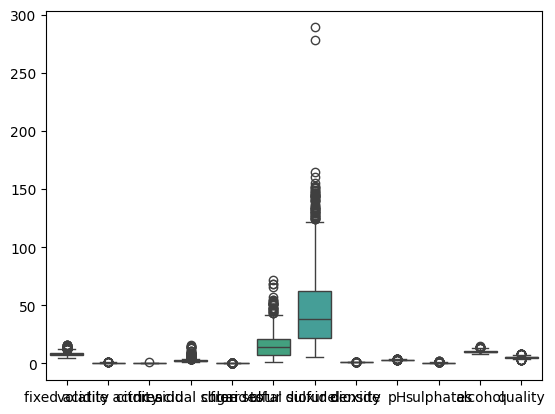

In [ ]:
sns.boxplot(data=data[[
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol',
    'quality'
]])

In [ ]:
data.duplicated().sum()


np.int64(240)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()


np.int64(0)

In [ ]:
def quality_label(q):
    if q <= 4:
        return 'low'
    elif q <= 6:
        return 'medium'
    else:
        return 'high'

# Apply the function
data['quality_label'] = data['quality'].apply(quality_label)

# Optional: check distribution
print(data['quality_label'].value_counts())
data = data.drop(columns=['quality'])


quality_label
medium    1112
high       184
low         63
Name: count, dtype: int64


In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,medium
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,medium


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['quality_label']=le.fit_transform(data['quality_label'])

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,2


In [ ]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
        'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates',
        'alcohol']

Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(Q1, Q3, IQR, lower_bound, upper_bound)

# Clip outliers
data[cols] = data[cols].clip(lower=lower_bound, upper=upper_bound, axis=1)


fixed acidity            7.1000
volatile acidity         0.3900
citric acid              0.0900
residual sugar           1.9000
chlorides                0.0700
free sulfur dioxide      7.0000
total sulfur dioxide    22.0000
density                  0.9956
pH                       3.2100
sulphates                0.5500
alcohol                  9.5000
Name: 0.25, dtype: float64 fixed acidity            9.20000
volatile acidity         0.64000
citric acid              0.43000
residual sugar           2.60000
chlorides                0.09100
free sulfur dioxide     21.00000
total sulfur dioxide    63.00000
density                  0.99782
pH                       3.40000
sulphates                0.73000
alcohol                 11.10000
Name: 0.75, dtype: float64 fixed acidity            2.10000
volatile acidity         0.25000
citric acid              0.34000
residual sugar           0.70000
chlorides                0.02100
free sulfur dioxide     14.00000
total sulfur dioxide    41.00000


<Axes: >

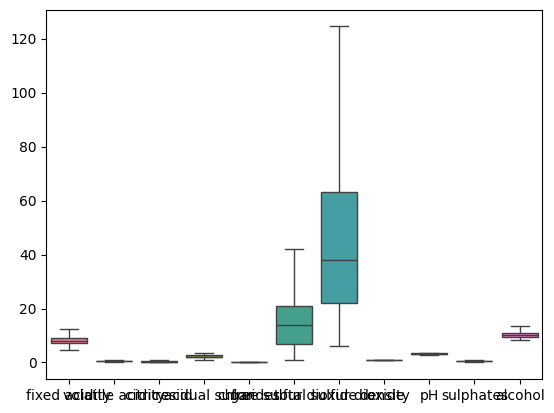

In [ ]:
sns.boxplot(data=data[[
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol'
]])

In [ ]:
num_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
            'sulphates', 'alcohol']

from sklearn.preprocessing import StandardScaler

sd = StandardScaler()
data_scaled = data.copy()
data_scaled[num_cols] = sd.fit_transform(data[num_cols])

data_scaled.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,-0.533308,0.971576,-1.394157,-0.698296,-0.288078,-0.478677,-0.391773,0.608506,1.341398,-0.654981,-0.961207,2
1,-0.292011,1.987398,-1.394157,0.454283,0.902462,0.942785,0.677343,0.051991,-0.726282,0.218684,-0.587463,2
2,-0.292011,1.310183,-1.189351,-0.039679,0.577769,-0.072545,0.256176,0.163294,-0.326086,0.000268,-0.587463,2
3,1.759013,-1.398676,1.473125,-0.698296,-0.342194,0.130521,0.450560,0.719809,-0.993080,-0.509370,-0.587463,2
5,-0.533308,0.745837,-1.394157,-0.862950,-0.342194,-0.275611,-0.197388,0.608506,1.341398,-0.654981,-0.961207,2


In [ ]:
data_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
count,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1359.000000
mean,-1.882232e-16,-3.032486e-16,7.319793e-17,-2.091369e-17,-1.150253e-16,-6.274108e-17,7.319793e-17,-1.321745e-14,7.110656e-16,-5.385276e-16,-4.601013e-16,1.682855
std,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,0.698363
min,-2.222387e+00,-2.301629e+00,-1.394157e+00,-2.344836e+00,-2.317408e+00,-1.494007e+00,-1.298902e+00,-2.469022e+00,-2.560515e+00,-2.329504e+00,-1.895565e+00,0.000000
25%,-7.142808e-01,-7.778958e-01,-9.333434e-01,-6.982956e-01,-6.127711e-01,-8.848088e-01,-7.805424e-01,-6.158274e-01,-6.595827e-01,-7.277859e-01,-8.677709e-01,2.000000
50%,-2.316868e-01,-4.424652e-02,-6.291864e-02,-2.043334e-01,-1.257319e-01,-1.740779e-01,-2.621833e-01,-3.660959e-03,7.411041e-03,-2.181483e-01,-2.137199e-01,2.000000
75%,5.525284e-01,6.329682e-01,8.075061e-01,4.542829e-01,5.236538e-01,5.366530e-01,5.477528e-01,6.196358e-01,6.077054e-01,5.827109e-01,6.272028e-01,2.000000
max,2.452742e+00,2.749264e+00,3.418781e+00,2.183151e+00,2.228291e+00,2.668846e+00,2.540196e+00,2.472831e+00,2.508637e+00,2.548456e+00,2.869663e+00,2.000000


In [ ]:
# Min-Max scaling for wine dataset
from sklearn.preprocessing import MinMaxScaler

num_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
            'sulphates', 'alcohol']

mm = MinMaxScaler()
data_minmax = data.copy()
data_minmax[num_cols] = mm.fit_transform(data[num_cols])

data_minmax.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,0.361290,0.648045,0.000000,0.363636,0.446429,0.243902,0.236287,0.622748,0.769737,0.343284,0.196078,2
1,0.412903,0.849162,0.000000,0.618182,0.708333,0.585366,0.514768,0.510135,0.361842,0.522388,0.274510,2
2,0.412903,0.715084,0.042553,0.509091,0.636905,0.341463,0.405063,0.532658,0.440789,0.477612,0.274510,2
3,0.851613,0.178771,0.595745,0.363636,0.434524,0.390244,0.455696,0.645270,0.309211,0.373134,0.274510,2
5,0.361290,0.603352,0.000000,0.327273,0.434524,0.292683,0.286920,0.622748,0.769737,0.343284,0.196078,2


In [ ]:
data_minmax.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,0.475364,0.455688,0.289669,0.517854,0.509802,0.358890,0.338335,0.499615,0.505117,0.477557,0.397791,1.682855
std,0.213977,0.198058,0.207850,0.220930,0.220069,0.240308,0.260574,0.202428,0.197344,0.205079,0.209931,0.698363
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.322581,0.301676,0.095745,0.363636,0.375000,0.146341,0.135021,0.375000,0.375000,0.328358,0.215686,2.000000
50%,0.425806,0.446927,0.276596,0.472727,0.482143,0.317073,0.270042,0.498874,0.506579,0.432836,0.352941,2.000000
75%,0.593548,0.581006,0.457447,0.618182,0.625000,0.487805,0.481013,0.625000,0.625000,0.597015,0.529412,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [ ]:
data_num = data.select_dtypes(include=['float64', 'int64'])
corr_matrix=data_num.corr()
corr_matrix


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
fixed acidity,1.000000,-0.267421,0.672454,0.214733,0.218094,-0.142253,-0.109957,0.669601,-0.693462,0.224572,-0.071651,-0.097740
volatile acidity,-0.267421,1.000000,-0.560157,0.038673,0.141735,-0.012927,0.088597,0.021525,0.248465,-0.311123,-0.205689,0.199744
citric acid,0.672454,-0.560157,1.000000,0.179259,0.147204,-0.047500,0.030291,0.361570,-0.555134,0.345605,0.106349,-0.165920
residual sugar,0.214733,0.038673,0.179259,1.000000,0.196879,0.080342,0.152674,0.409174,-0.097583,0.018561,0.109226,-0.068317
chlorides,0.218094,0.141735,0.147204,0.196879,1.000000,-0.007580,0.107389,0.404969,-0.264409,0.127595,-0.306170,0.143364
free sulfur dioxide,-0.142253,-0.012927,-0.047500,0.080342,-0.007580,1.000000,0.685832,-0.024608,0.059621,0.049309,-0.081324,0.099416
total sulfur dioxide,-0.109957,0.088597,0.030291,0.152674,0.107389,0.685832,1.000000,0.103915,-0.066471,-0.005515,-0.244589,0.181668
density,0.669601,0.021525,0.361570,0.409174,0.404969,-0.024608,0.103915,1.000000,-0.347814,0.157616,-0.508409,0.158113
pH,-0.693462,0.248465,-0.555134,-0.097583,-0.264409,0.059621,-0.066471,-0.347814,1.000000,-0.154669,0.202165,0.021697
sulphates,0.224572,-0.311123,0.345605,0.018561,0.127595,0.049309,-0.005515,0.157616,-0.154669,1.000000,0.157635,-0.220520


<Axes: >

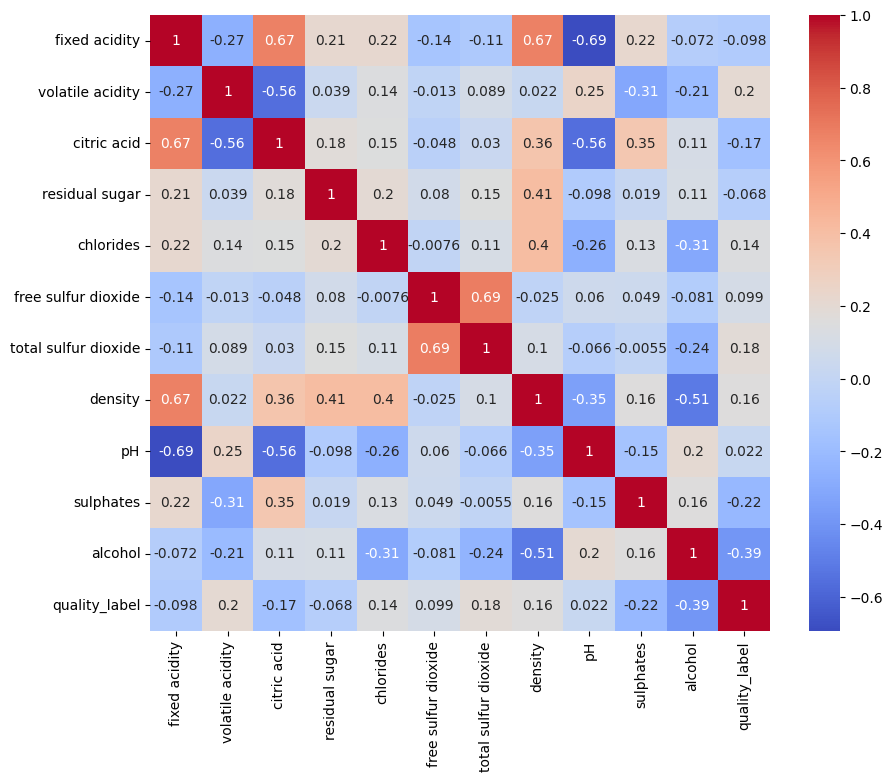

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')

In [ ]:
data_num2 = data_minmax.select_dtypes(include=['float64', 'int64'])
corr_matrix2=data_num2.corr()
corr_matrix2


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
fixed acidity,1.000000,-0.267421,0.672454,0.214733,0.218094,-0.142253,-0.109957,0.669601,-0.693462,0.224572,-0.071651,-0.097740
volatile acidity,-0.267421,1.000000,-0.560157,0.038673,0.141735,-0.012927,0.088597,0.021525,0.248465,-0.311123,-0.205689,0.199744
citric acid,0.672454,-0.560157,1.000000,0.179259,0.147204,-0.047500,0.030291,0.361570,-0.555134,0.345605,0.106349,-0.165920
residual sugar,0.214733,0.038673,0.179259,1.000000,0.196879,0.080342,0.152674,0.409174,-0.097583,0.018561,0.109226,-0.068317
chlorides,0.218094,0.141735,0.147204,0.196879,1.000000,-0.007580,0.107389,0.404969,-0.264409,0.127595,-0.306170,0.143364
free sulfur dioxide,-0.142253,-0.012927,-0.047500,0.080342,-0.007580,1.000000,0.685832,-0.024608,0.059621,0.049309,-0.081324,0.099416
total sulfur dioxide,-0.109957,0.088597,0.030291,0.152674,0.107389,0.685832,1.000000,0.103915,-0.066471,-0.005515,-0.244589,0.181668
density,0.669601,0.021525,0.361570,0.409174,0.404969,-0.024608,0.103915,1.000000,-0.347814,0.157616,-0.508409,0.158113
pH,-0.693462,0.248465,-0.555134,-0.097583,-0.264409,0.059621,-0.066471,-0.347814,1.000000,-0.154669,0.202165,0.021697
sulphates,0.224572,-0.311123,0.345605,0.018561,0.127595,0.049309,-0.005515,0.157616,-0.154669,1.000000,0.157635,-0.220520


<Axes: >

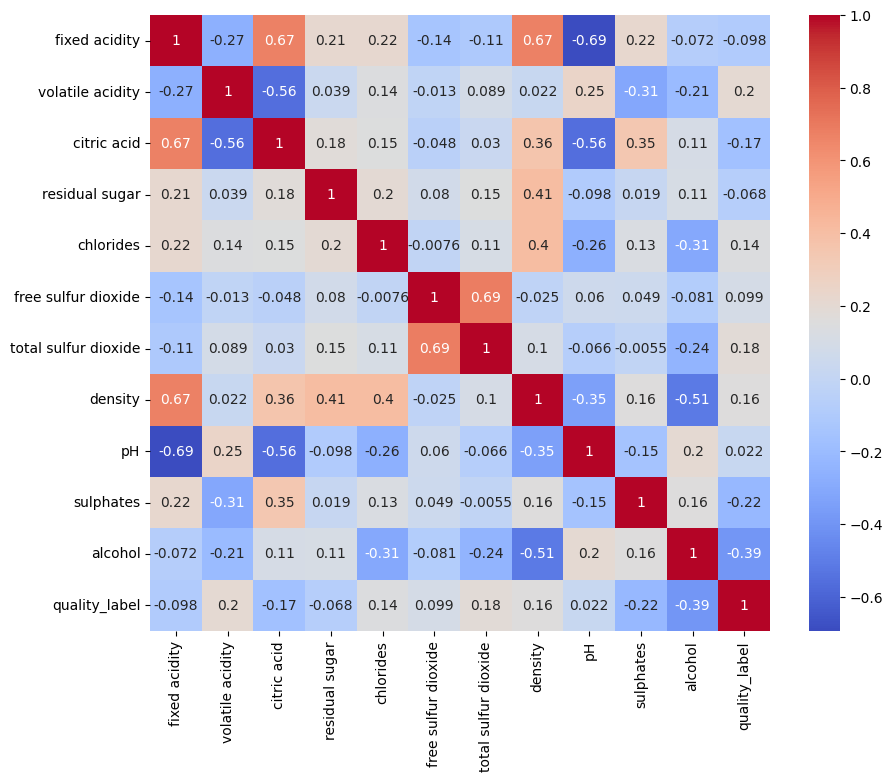

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix2,annot=True,cmap='coolwarm')

In [ ]:
data_num3 = data_scaled.select_dtypes(include=['float64', 'int64'])
corr_matrix3=data_num3.corr()
corr_matrix3



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
fixed acidity,1.000000,-0.267421,0.672454,0.214733,0.218094,-0.142253,-0.109957,0.669601,-0.693462,0.224572,-0.071651,-0.097740
volatile acidity,-0.267421,1.000000,-0.560157,0.038673,0.141735,-0.012927,0.088597,0.021525,0.248465,-0.311123,-0.205689,0.199744
citric acid,0.672454,-0.560157,1.000000,0.179259,0.147204,-0.047500,0.030291,0.361570,-0.555134,0.345605,0.106349,-0.165920
residual sugar,0.214733,0.038673,0.179259,1.000000,0.196879,0.080342,0.152674,0.409174,-0.097583,0.018561,0.109226,-0.068317
chlorides,0.218094,0.141735,0.147204,0.196879,1.000000,-0.007580,0.107389,0.404969,-0.264409,0.127595,-0.306170,0.143364
free sulfur dioxide,-0.142253,-0.012927,-0.047500,0.080342,-0.007580,1.000000,0.685832,-0.024608,0.059621,0.049309,-0.081324,0.099416
total sulfur dioxide,-0.109957,0.088597,0.030291,0.152674,0.107389,0.685832,1.000000,0.103915,-0.066471,-0.005515,-0.244589,0.181668
density,0.669601,0.021525,0.361570,0.409174,0.404969,-0.024608,0.103915,1.000000,-0.347814,0.157616,-0.508409,0.158113
pH,-0.693462,0.248465,-0.555134,-0.097583,-0.264409,0.059621,-0.066471,-0.347814,1.000000,-0.154669,0.202165,0.021697
sulphates,0.224572,-0.311123,0.345605,0.018561,0.127595,0.049309,-0.005515,0.157616,-0.154669,1.000000,0.157635,-0.220520


<Axes: >

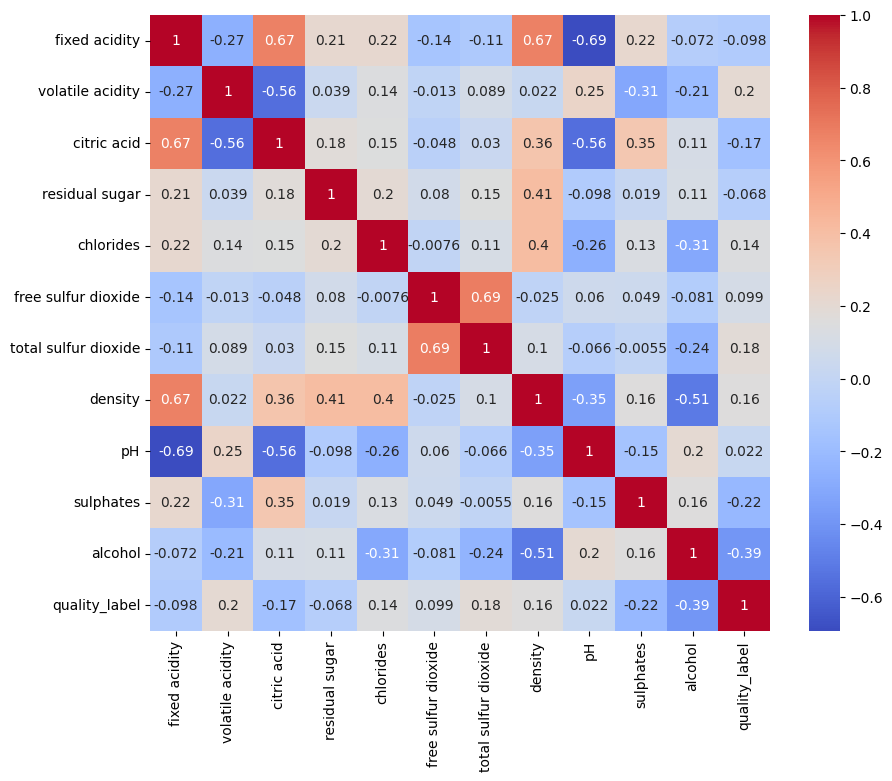

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix3,annot=True,cmap='coolwarm')


In [ ]:
from sklearn.model_selection import train_test_split
y=data['quality_label']
x=data_scaled.drop(columns=['quality_label'])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1087, 11) (272, 11) (1087,) (272,)


In [ ]:
x_test.index

Index([  55, 1291, 1544,  593, 1261,  491, 1004,  889, 1154,  824,
       ...
        785, 1260, 1280,  710,  667, 1086,  662,  279, 1111,  737],
      dtype='int64', length=272)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
lr = LogisticRegression()
lr_model=lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)

print(accuracy_score(y_test,lr_pred))
print(classification_report(y_test,lr_pred))
print(confusion_matrix(y_test,lr_pred))

0.8455882352941176
              precision    recall  f1-score   support

           0       0.61      0.50      0.55        34
           1       1.00      0.07      0.12        15
           2       0.87      0.95      0.91       223

    accuracy                           0.85       272
   macro avg       0.83      0.51      0.53       272
weighted avg       0.85      0.85      0.82       272

[[ 17   0  17]
 [  0   1  14]
 [ 11   0 212]]
